# Sistemas dimámicos dos dimensionales

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.

In [1]:
#Sacamos nuestro runge-kutta
function runge_kutta(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h/2
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end;

In [2]:
using PyPlot

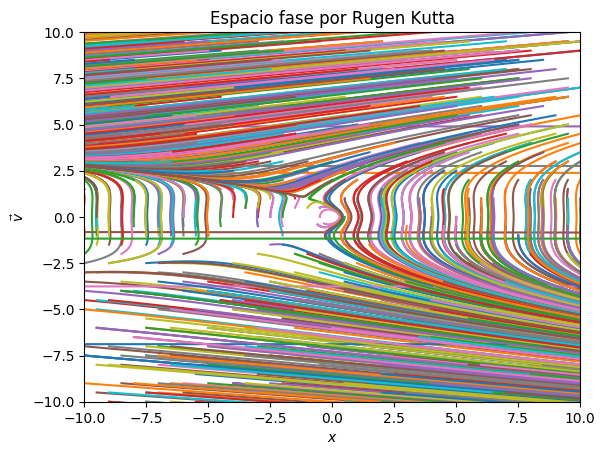

In [3]:
#Ponemos el intervalo donde queremos que lo grafique
list= -1:0.01:5;

#La función que queremos resolver.
uno(x,t)=[x[2]-(x[2])^3,-x[1]-(x[2])^2] #donde x[1]=x | x[2]=y

for i in 1:1000
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(uno,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel(L"x")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-10,10)
    ylim(-10,10)
end;

* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

Vistas las intrucciones de otra manera:

$$\vec F=\left(\begin{array}{cc} y-y^3 \\ -x-y^2 \end{array} \right) = \vec 0$$

Primero obtenemos los otros puntos fijos, igualando los renglones a 0. Es decir:

$$y-y^3 = 0$$
$$-x-y^2 = 0$$

A partir de la primera ecuación:
$$y(1-y^2) = 0$$

Por lo que los puntos críticos en $y$ son:
$$y = 0,-1,1$$

Y en x son:
$$x = 0,-1$$

Luego, nos enfocaremos en (-1,1) y en (-1,-1) en el Jacobiano...

Calculamos el jacobiano, el cual en este caso está dado por:

$$J=\left(\begin{array}{cc} \frac{d f_1}{d x} & \frac{d f_1}{d y} \\ \frac{d f_2}{d x} & \frac{d f_2}{d y} \end{array} \right)$$


Desarrollando, el jacobiano nos queda:

$$J = \left(\begin{array}{cc} 0 & 1-3y^2 \\ -1 & -2y \end{array} \right)$$


Sabemos que, en el caso de la matriz de $2$x$2$, la traza es $\tau = a_{11}+a_{22}$ y el determinante es $\Delta= (a_{11}a_{22})-(a_{12}a_{21})$.

Para $x=-1$,$y=1$:

$$\tau=0+(-2)$$
$$\tau=-2$$

$$\Delta= (0)(-2)-(-1)(-2)$$
$$\Delta= -2$$

Para $x=-1$,$y=-1$:

$$\tau=0+(2)$$
$$\tau=2$$

$$\Delta= (0)(2)-(-1)(-2)$$
$$\Delta= -2$$

El siguiente diagrama del Strogratz muestra los tipos de puntos fijos y su ubicación en el espacio $(\Delta, \tau)$ para los sistemas lineales de dos dimensiones:

http://prntscr.com/gwpa50 (pues no sé insertar imagenes)

Se observa que $(\Delta, \tau)=(-2,-2),(-2,2)$ resultan ser puntos silla. Por lo tanto $\vec 0$ es punto silla.

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

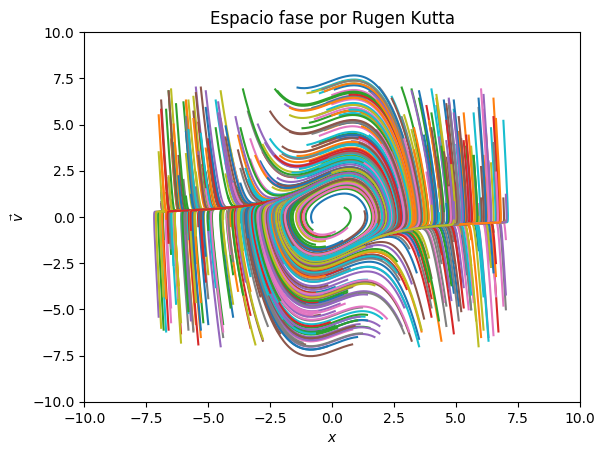

In [4]:
list= -1:0.01:10;

#La función que queremos resolver.
dos(x,t)=[x[2],0.5*(1-x[1]^2)*x[2]-x[1]]

for i in 1:700
    condiciones = .1*rand(-70:70,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(dos,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel(L"x")
    ylabel(L"\vec{v}")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-10,10)
    ylim(-10,10)
    end;

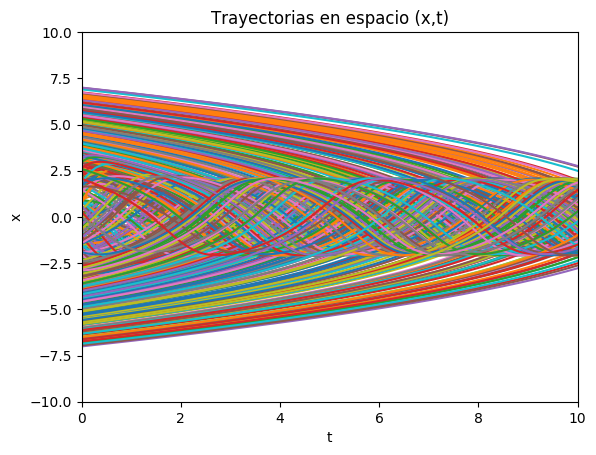

In [5]:
for i in 1:700
    condiciones = .1*rand(-70:70,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(dos,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    #mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel("x")
    title("Trayectorias en espacio (x,t)")
    plot(list,mlistx1_kutta);
    xlim(0,10)
    ylim(-10,10)
    end;

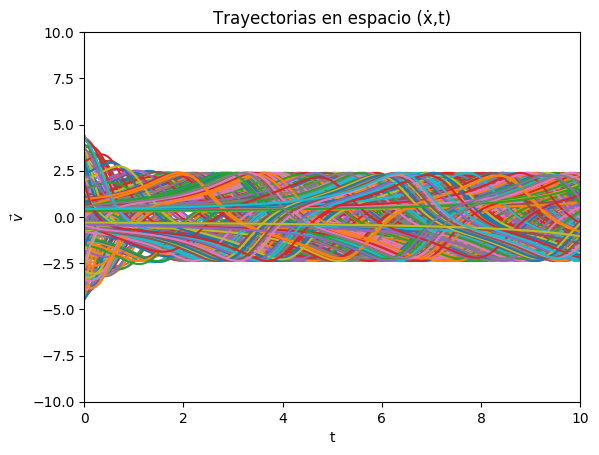

In [6]:
for i in 1:700
    condiciones = .1*rand(-70:70,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(dos,list,condiciones);
    #mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Trayectorias en espacio (ẋ,t)")
    plot(list,mlistx2_kutta);
    xlim(0,10)
    ylim(-10,10)
    end;

__Ejercicio 3:__ Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.

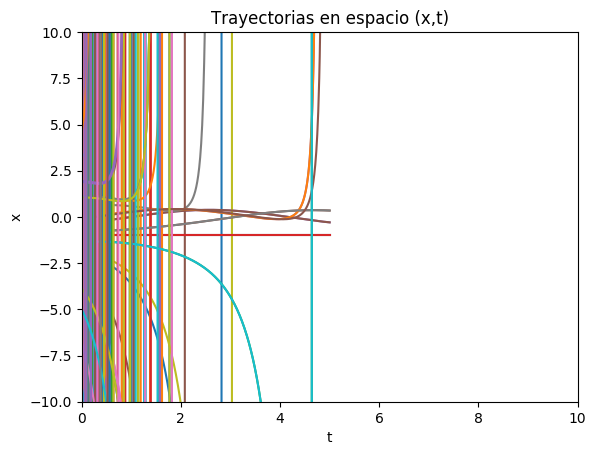

In [7]:
list= -1:0.01:5;

for i in 1:700
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(uno,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    #mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel("x")
    title("Trayectorias en espacio (x,t)")
    plot(list,mlistx1_kutta);
    xlim(0,10)
    #ylim(-10000,10000)
    ylim(-10,10)
    end;

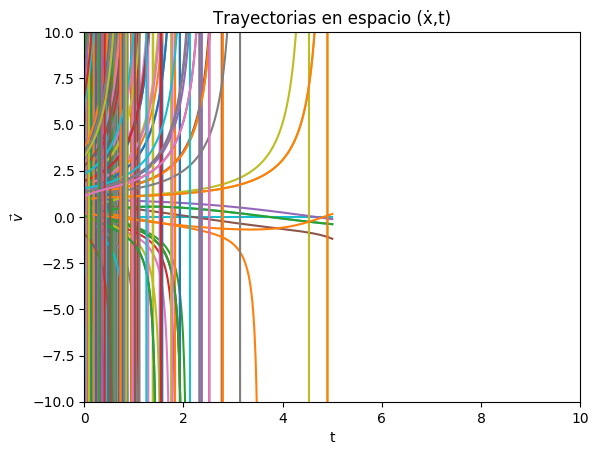

In [8]:
list= -1:0.01:5;

for i in 1:700
    condiciones = 0.5*rand(-20:20,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(uno,list,condiciones);
    #mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Trayectorias en espacio (ẋ,t)")
    plot(list,mlistx2_kutta);
    xlim(0,10)
    ylim(-10,10)
    end;

__Ejercicio 4:__ Hacer lo mismo para el sistema:
\begin{align*}
\dot x&= x+y-x (x^2+y^2)\\
\dot y &= y-x-y(x^2+y^2)
\end{align*}
Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

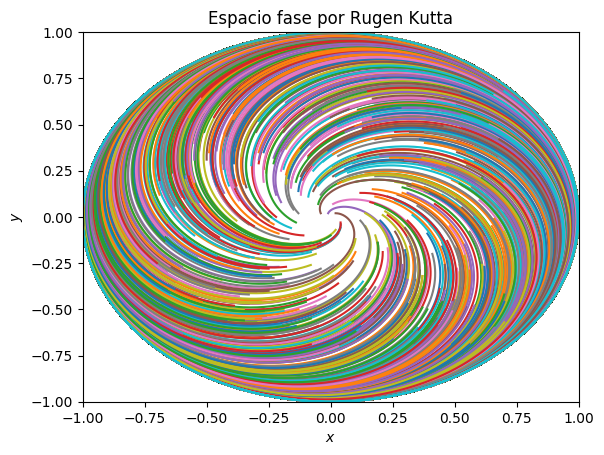

In [9]:
list= -1:0.01:10;

#La función que queremos resolver.
tres(x,t)=[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),x[2]-x[1]-x[2]*(x[1]^2+x[2]^2)]

for i in 1:700
    condiciones = 0.01*rand(-70:70,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(tres,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel(L"x")
    ylabel(L"y")
    title("Espacio fase por Rugen Kutta")
    plot(mlistx1_kutta,mlistx2_kutta);
    xlim(-1,1)
    ylim(-1,1)
    end;

Desde aquí se observa que (0,0) es repulsor y el disco unitario $x^2+y^2=1$ es un atractor.

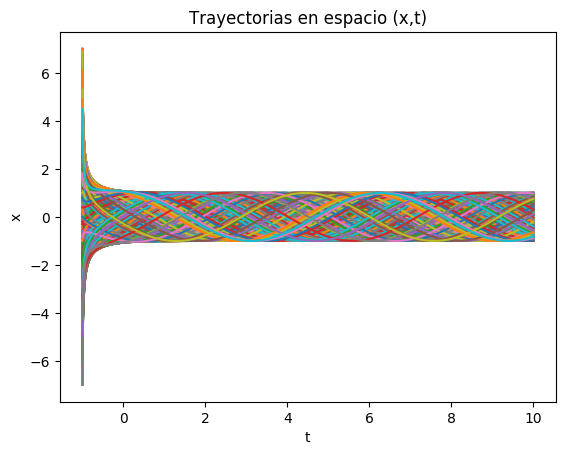

In [10]:
for i in 1:700
    condiciones = 0.1*rand(-70:70,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(tres,list,condiciones);
    mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    #mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel("x")
    title("Trayectorias en espacio (x,t)")
    plot(list,mlistx1_kutta);
    end;

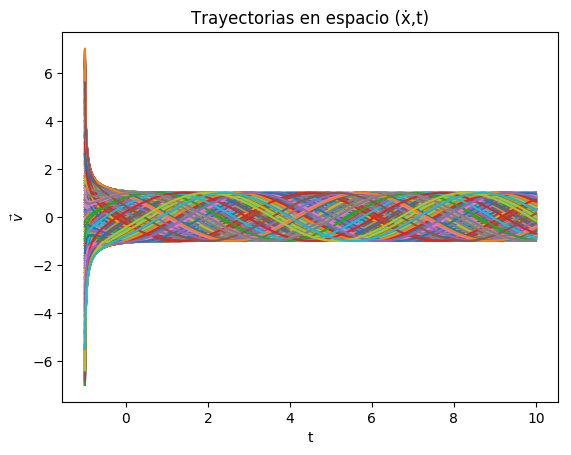

In [11]:
for i in 1:700
    condiciones = 0.1*rand(-70:70,2,1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(tres,list,condiciones);
    #mlistx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    mlistx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    xlabel("t")
    ylabel(L"\vec{v}")
    title("Trayectorias en espacio (ẋ,t)")
    plot(list,mlistx2_kutta);
    end;

Para comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$ necesitaremos calcular $\Delta$ y $\tau$ y tendremos que verlo en el diagrama de Strotgratz:

Calculamos el jacobiano, el cual en este caso está dado por:

$$J=\left(\begin{array}{cc} \frac{d f_1}{d x} & \frac{d f_1}{d y} \\ \frac{d f_2}{d x} & \frac{d f_2}{d y} \end{array} \right)$$

Desarrollando, el jacobiano nos queda:

$$J = \left(\begin{array}{cc} 1-(x^2+y^2) & 1 \\ -1 & 1-(x^2+y^2) \end{array} \right)$$

Sabemos que, en el caso de la matriz de $2$x$2$, la traza es $\tau = a_{11}+a_{22}$ y el determinante es $\Delta= (a_{11}a_{22})-(a_{12
}a_{21})$.

Para $x=0$,$y=0$:

$$\tau=(1-(0^2+0^2))+(1-(0^2+0^2))$$
$$\tau=2$$

$$\Delta= (1-(0^2+0^2))(1-(0^2+0^2))-(-1)(1)$$
$$\Delta= 2$$

Como $(\Delta,\tau)=(2,2)$ y conociendo que $\tau^2-4\Delta = 0$ en el diagrama de Strotgratz, $(x,y) = (0,0)$ es una espiral inestable, es decir, un repulsor.

Para $x^2+y^2=1$

$$\tau=(1-(1))+(1-(1))$$
$$\tau=0$$

$$\Delta= (1-(1))(1-(1))-(-1)(1)$$
$$\Delta= 1$$

Como $(\Delta,\tau)=(1,0)$, $x^2+y^2=1$ es un centro, es decir, un conjunto atractor.